In [1]:
# !pip install plotlib

In [2]:
# Load libraries
import random
import torch
from plot_lib import set_default, show_mat
from matplotlib.pyplot import plot, subplot
from numpy import pi as π

In [3]:
# Set style (needs to be in a new cell)
set_default(figsize=(10, 4), dpi=200)

In [4]:
# Generate a collection of 5 3D vectors on a sphere
A = torch.nn.functional.normalize(torch.randn(5, 3), p=2, dim=1)

In [5]:
# Checking the content
A

tensor([[ 0.7012,  0.3137,  0.6403],
        [ 0.8151,  0.1438,  0.5611],
        [-0.0137, -0.9648, -0.2628],
        [-0.3076, -0.9174, -0.2526],
        [ 0.0948,  0.6812,  0.7259]])

In [6]:
# And the norm
A.norm(p=2, dim=1)

tensor([1., 1., 1., 1., 1.])

In [7]:
# Change the value of the dimensionality d
d = 8  # 1, 2, [3], 5, 8
A = torch.nn.functional.normalize(torch.randn(10, d), 2, 1)

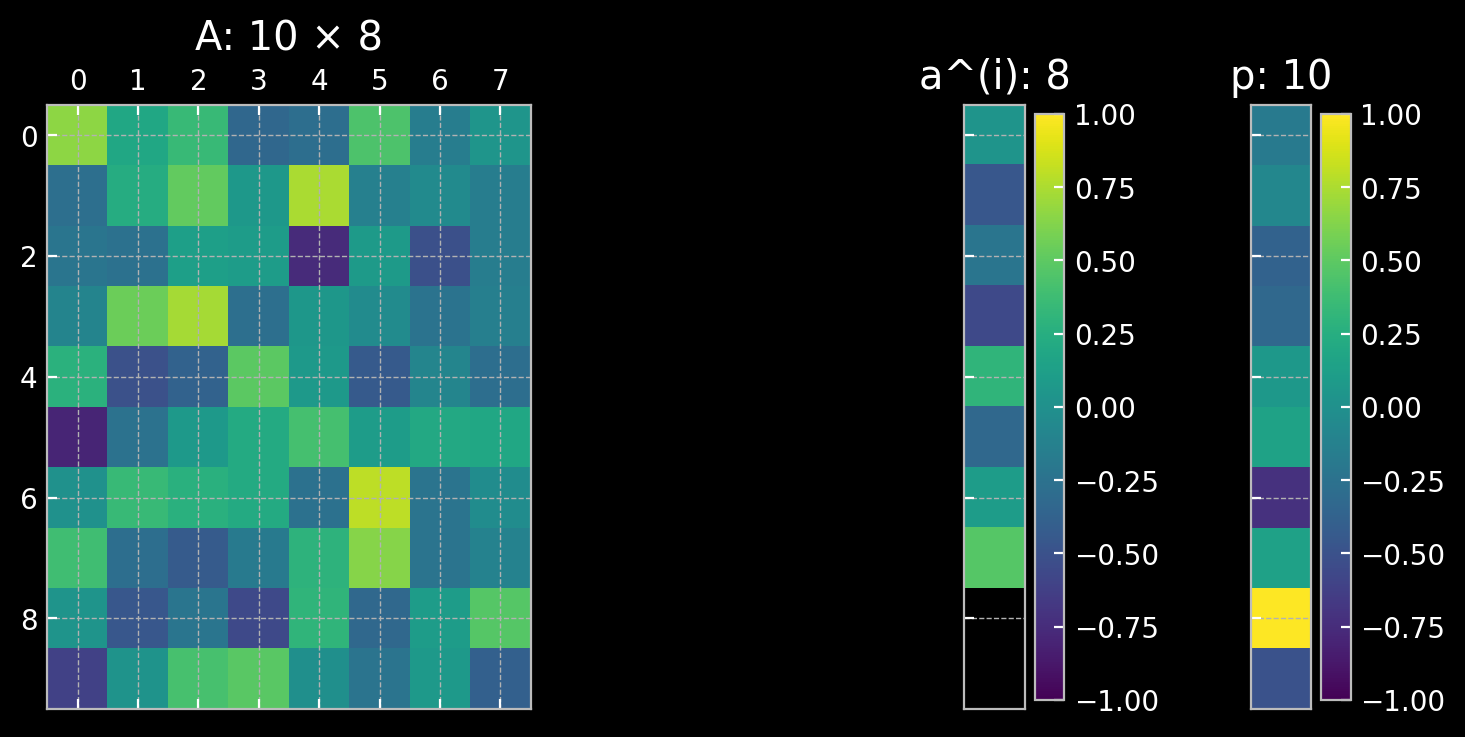

In [8]:
# Run this multiple times per given d
a = A[[random.randrange(A.size(0))],:].t()  # perhaps comment, if playing with vis
p = A @ a
# p = torch.abs(A @ a)

# Plot
show_mat(A, a, p, threshold=-1)  # pick threshold ∈ [-1, +1), default -1

(0.0, 0.0175)

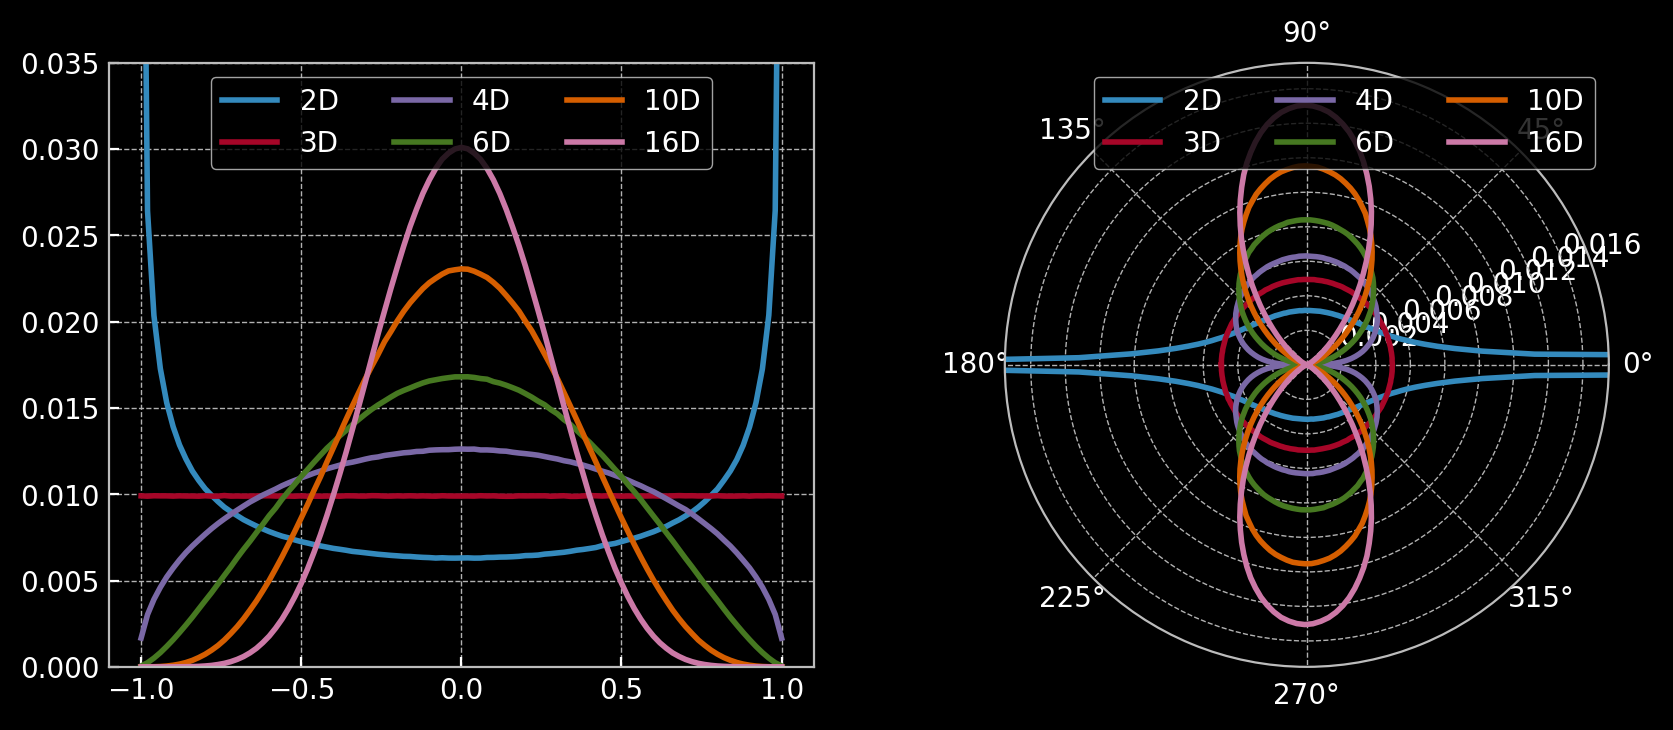

In [9]:
# Compute the histogram of points uniformly distributed on a unit sphere in d dimensions
bins = 101
N = 10_000
d_range = (2, 3, 4, 6, 10, 16); z = 1
# d_range = d_range + (256,); z = 4  # uncomment
ax1 = subplot(121)
ax2 = subplot(122, projection='polar')
for d in d_range:
    A = torch.nn.functional.normalize(torch.randn(N, d), 2, 1)
    B = torch.nn.functional.normalize(torch.randn(N, d), 2, 1)
    h = torch.histc((A @ B.t()).view(-1), bins, -1, 1) / N**2
    ax1.plot(torch.linspace(-1, 1, bins).numpy(), h.numpy())
    ax2.plot(π * torch.linspace(-1, +1, 2 * bins).numpy(), torch.cat((h, h)).numpy() / 2)
ax1.legend([f'{d}D' for d in d_range], ncol=3)
ax1.set_ylim(0, 35e-3 * z)
ax2.legend([f'{d}D' for d in d_range], ncol=3)
ax2.set_rlim(0, 35e-3 * z / 2)

These curves are simply the probability density function of a $\Gamma$ distribution, with $\alpha = \beta = (D - 1) / 2$.
See why this is the case [here](https://stats.stackexchange.com/a/85977/31844).
More about curse of dimensionality and almost orthogonality [here](https://www.cs.princeton.edu/courses/archive/fall15/cos521/lecnotes/lec12.pdf).